In [ ]:
#project practice 1

In [ ]:
#Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
Attribute Information
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)
What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 
Inspiration
Use machine learning to determine which physiochemical properties make a wine 'good'!


In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [3]:
df=pd.read_csv('C:\\Users\Ankit Singh\Downloads\winequality-red.csv')

In [12]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df.shape

(1599, 12)

here 1599 rows and 12 column are present in this dataset.

In [10]:
zdf.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

here one int datatype ,11 float datatype present.

In [11]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

no null value present in this dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:>

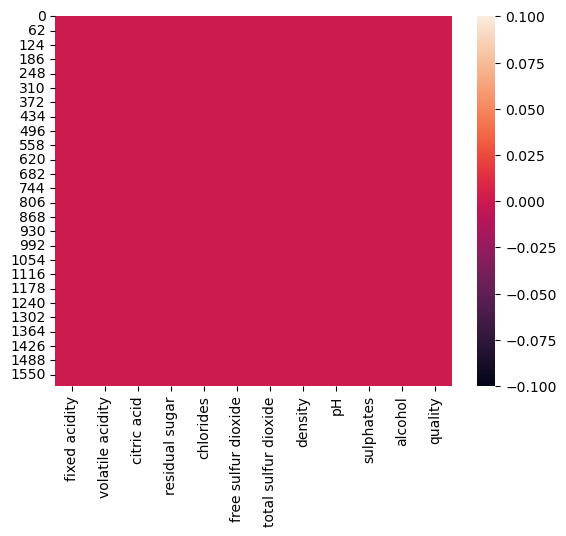

In [4]:
#visualize null value using heatmap
sns.heatmap(df.isnull())

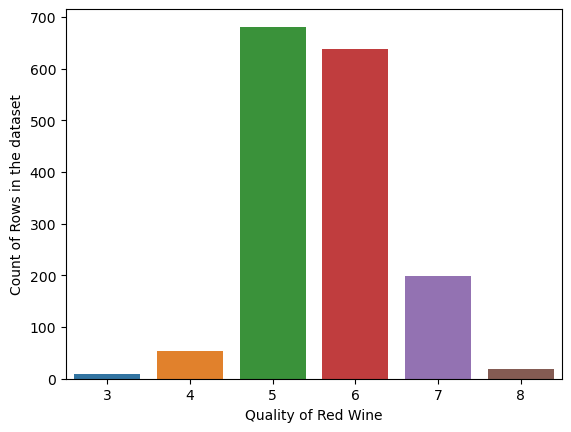

In [26]:

sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel(' Rows in the dataset')
plt.show()

this plot represent various categories of red wine quality shows that the number of data present for quality score 5 and 6 which indicates an imbalance which will need to be rectified using  machine learning model .

In [7]:
df['pH'].unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.35, 3.28, 3.58, 3.17,
       3.11, 3.38, 3.04, 3.52, 3.43, 3.34, 3.47, 3.46, 3.45, 3.4 , 3.42,
       3.23, 3.5 , 3.33, 3.21, 3.48, 3.9 , 3.25, 3.32, 3.15, 3.41, 3.44,
       3.31, 3.54, 3.13, 2.93, 3.14, 3.75, 3.85, 3.29, 3.08, 3.37, 3.19,
       3.07, 3.49, 3.53, 3.24, 3.63, 3.22, 3.68, 2.74, 3.59, 3.  , 3.12,
       3.57, 3.61, 3.06, 3.6 , 3.69, 3.1 , 3.05, 3.67, 3.27, 3.18, 3.02,
       3.55, 2.99, 3.01, 3.56, 3.03, 3.62, 2.88, 2.95, 2.98, 3.09, 2.86,
       3.74, 2.92, 3.72, 2.87, 2.89, 2.94, 3.66, 3.71, 3.78, 3.7 , 4.01,
       2.9 ])

In [8]:
df['pH'].nunique()

89

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

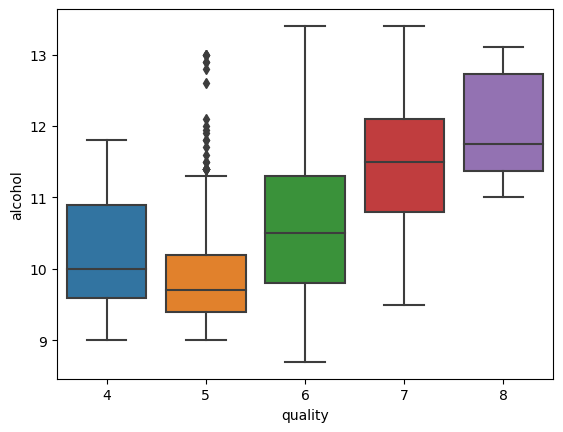

In [125]:
sns.boxplot(data=df,x='quality',y='alcohol')

outliers are present at 5

In [42]:
subdata=df[['volatile acidity','pH','alcohol','density','total sulfur dioxide','quality']]

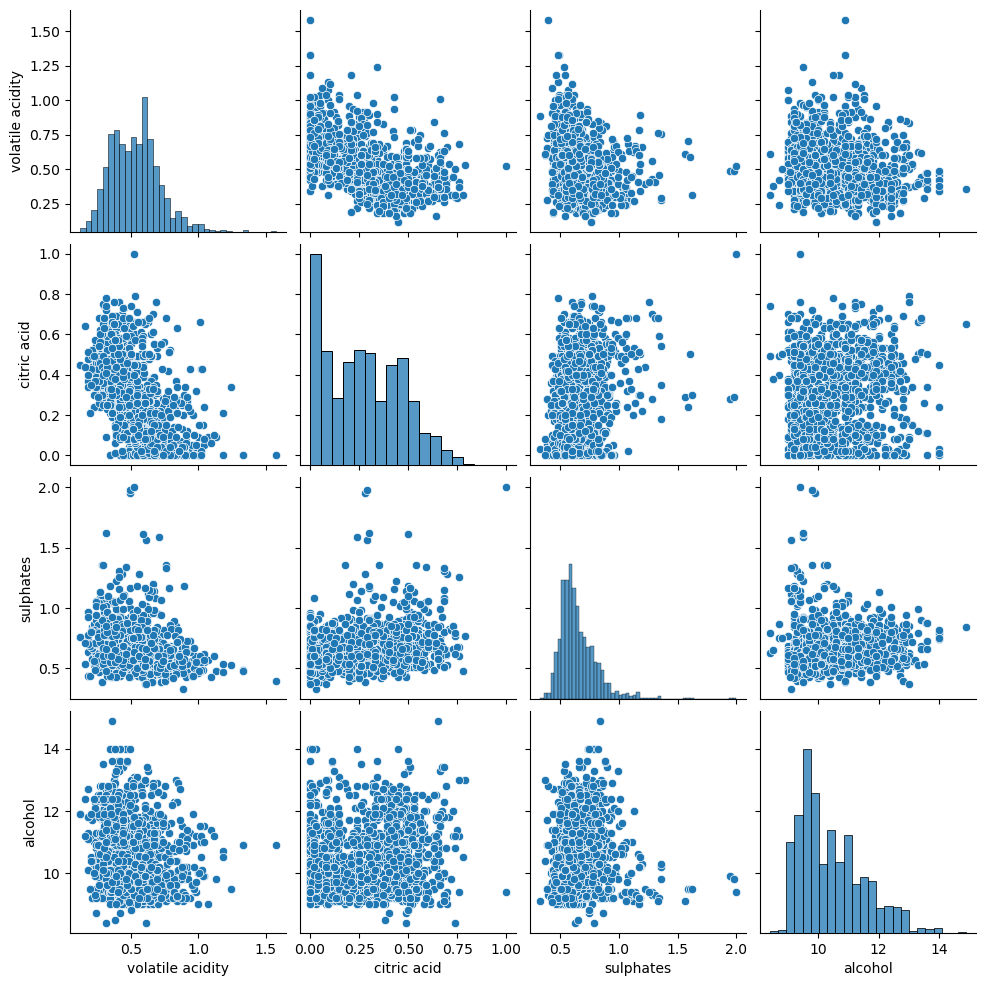

In [43]:

sns.pairplot(subData)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

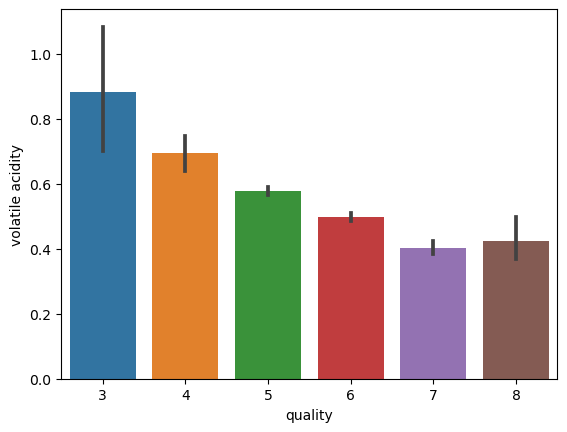

In [38]:
sns.barplot(x='quality',y='volatile acidity',data=df)

this bar plot represent that if value of volatile acidity is large then quality of wine is low.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

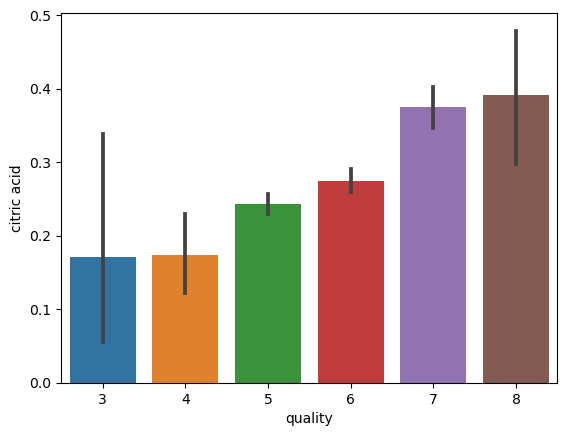

In [39]:
sns.barplot(x='quality',y='citric acid',data=df)

This bar plot represent that if content of citric acid content id high then quality of wine is good

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

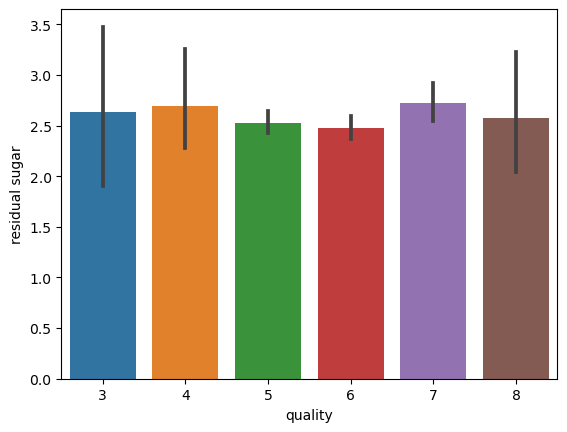

In [45]:
sns.barplot(x='quality',y='residual sugar',data=df)

This barplot represent that the value of residual sugar not effect the quality of wine.

In [46]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<AxesSubplot:xlabel='quality', ylabel='chlorides'>

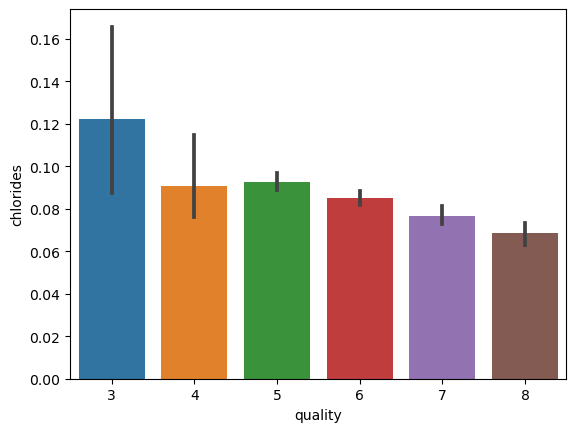

In [47]:
sns.barplot(x='quality',y='chlorides',data=df)

this bar plot represent that if content of chloride is large then quality of wine is low.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

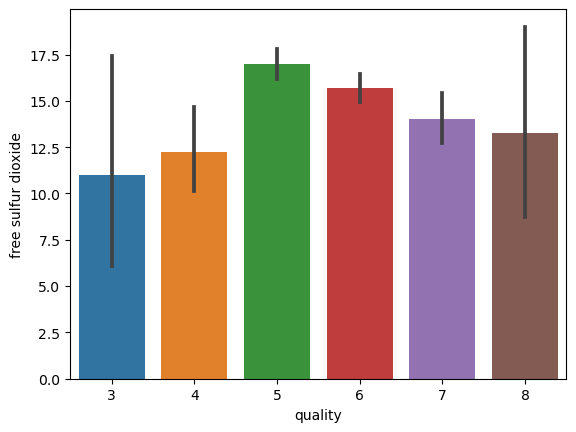

In [48]:
sns.barplot(x='quality',y='free sulfur dioxide',data=df)

this bar plot represent that if content of chloride is high the it gives quality of wine value is 5 and 6 which is moderate.

<AxesSubplot:xlabel='quality', ylabel='density'>

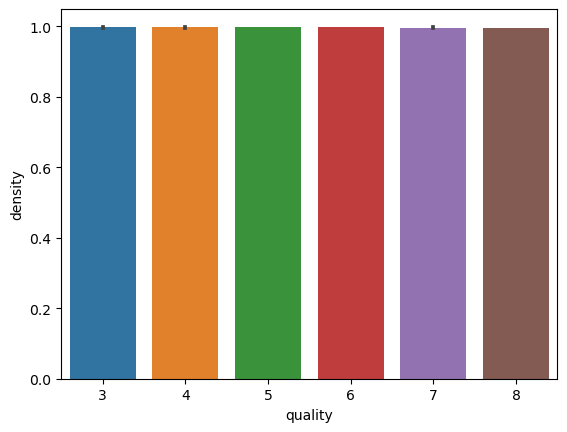

In [49]:
sns.barplot(x='quality',y='density',data=df)

this bar plot represent that density doesn't effect on quality of wine.



<AxesSubplot:xlabel='quality', ylabel='pH'>

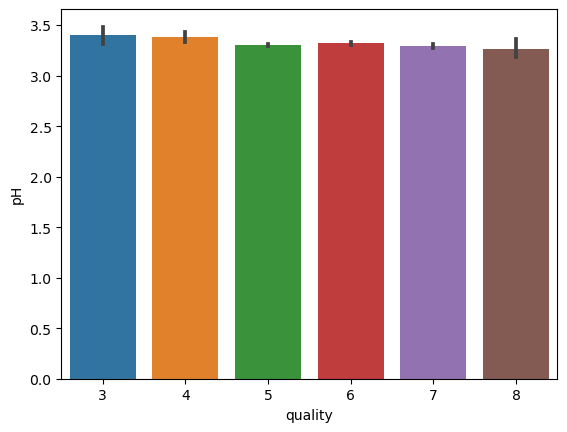

In [50]:
sns.barplot(x='quality',y='pH',data=df)

this graph represent constant pH for qualty of wine.

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

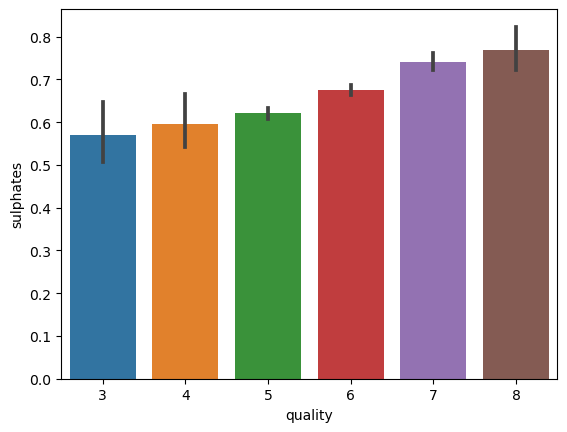

In [51]:
sns.barplot(x='quality',y='sulphates',data=df)

this bar plot represent that if content of sulphates is large then quality of wine is high.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

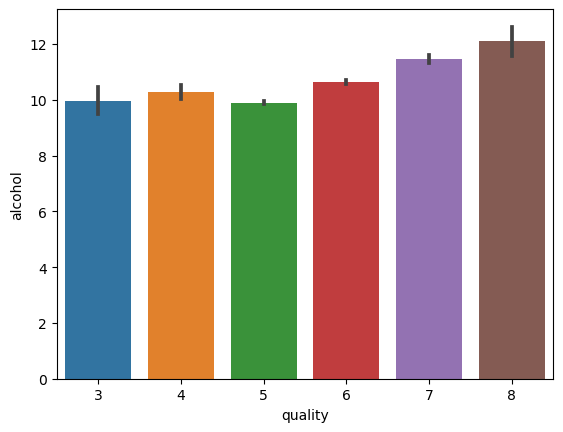

In [52]:
sns.barplot(x='quality',y='alcohol',data=df)

this bar plot represent that if content of sulphates is large then quality of wine is high.

In [53]:
#statistical analysis
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [117]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

 we see that fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, sulphates and alcohol are all outside the acceptable range of +/-0.5.

In [120]:
# Z score method

z=np.abs(zscore(df))
threshold=3
np.where(z>3)

df=df[(z<3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [119]:
df.shape

(1451, 12)

In [121]:

# Percentage of Data Loss=1599 (number of rows in the original dataframe) and 1464 (number of rows after outlier removal)

data_loss=(1599-1464)/1599*100 


In [122]:
data_loss

8.442776735459661

correlation
positive correlation
negative correlation

In [54]:
correlation=df.corr()

<AxesSubplot:>

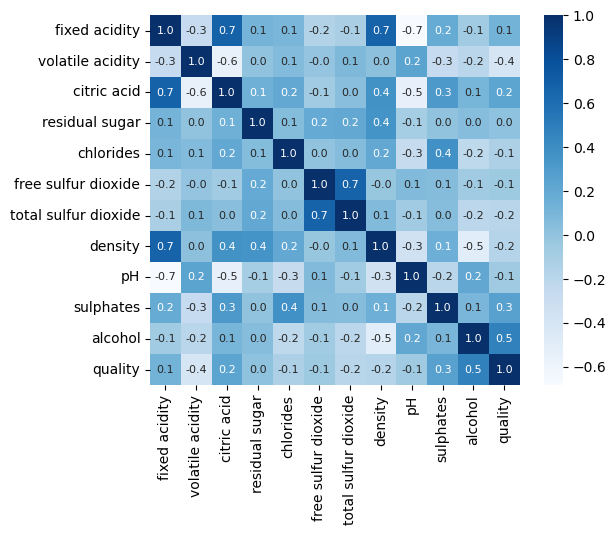

In [63]:
sns.heatmap(correlation,cmap='Blues',cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size':8})

it represent which column are positively correlated which is negatively correlated.
for example :
    quality vs alcohol: positive correlation,
    quality  vs   volatile acidity:negative correlation

separate the data and label

In [64]:
X=df.drop('quality',axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [67]:
Y=df['quality']

In [68]:
Y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [70]:
Y=df['quality'].apply(lambda y_value:1 if y_value>=7 else 0)

In [71]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [ ]:
#split the data

In [77]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [78]:
print(Y.shape)

(1599,)


In [79]:
print(Y_train.shape)

(1279,)


In [80]:
print(Y_test.shape)

(320,)


# Model Training

In [86]:
model=LogisticRegression()


In [87]:
 model.fit(X_train, Y_train)

LogisticRegression()

In [88]:
pred = model.predict(X_test)

In [92]:
# Accuracy Score
acc_score = (accuracy_score(Y_test, pred))*100
print("Accuracy Score:", acc_score)

Accuracy Score: 88.75


In [94]:
# Classification Report
class_report = classification_report(Y_test, pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       279
           1       0.61      0.34      0.44        41

    accuracy                           0.89       320
   macro avg       0.76      0.65      0.69       320
weighted avg       0.87      0.89      0.87       320



In [96]:
# Cross Validation Score
cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)

Cross Validation Score: 86.8044670846395


In [111]:
# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)


Accuracy Score - Cross Validation Score is 1.3822492163009343


In [97]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

In [112]:
# Accuracy Score
acc_score = (accuracy_score(Y_test, pred))*100
print("Accuracy Score:", acc_score)


# Classification Report
class_report = classification_report(Y_test, pred)
print("\nClassification Report:\n", class_report)


# Cross Validation Score
cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)


# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 88.75

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       279
           1       0.61      0.34      0.44        41

    accuracy                           0.89       320
   macro avg       0.76      0.65      0.69       320
weighted avg       0.87      0.89      0.87       320

Cross Validation Score: 86.0540752351097

Accuracy Score - Cross Validation Score is 2.695924764890293


In [102]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

In [113]:
# Accuracy Score
acc_score = (accuracy_score(Y_test, pred))*100
print("Accuracy Score:", acc_score)


# Classification Report
class_report = classification_report(Y_test, pred)
print("\nClassification Report:\n", class_report)


# Cross Validation Score
cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)




# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 88.75

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       279
           1       0.61      0.34      0.44        41

    accuracy                           0.89       320
   macro avg       0.76      0.65      0.69       320
weighted avg       0.87      0.89      0.87       320

Cross Validation Score: 86.0540752351097

Accuracy Score - Cross Validation Score is 2.695924764890293


In [104]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

In [114]:
# Accuracy Score
acc_score = (accuracy_score(Y_test, pred))*100
print("Accuracy Score:", acc_score)


# Classification Report
class_report = classification_report(Y_test, pred)
print("\nClassification Report:\n", class_report)


# Cross Validation Score
cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)


# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 88.75

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       279
           1       0.61      0.34      0.44        41

    accuracy                           0.89       320
   macro avg       0.76      0.65      0.69       320
weighted avg       0.87      0.89      0.87       320

Cross Validation Score: 86.0540752351097

Accuracy Score - Cross Validation Score is 2.695924764890293


In [106]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

In [115]:
# Accuracy Score
acc_score = (accuracy_score(Y_test, pred))*100
print("Accuracy Score:", acc_score)


# Classification Report
class_report = classification_report(Y_test, pred)
print("\nClassification Report:\n", class_report)


# Cross Validation Score
cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)


# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 88.75

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       279
           1       0.61      0.34      0.44        41

    accuracy                           0.89       320
   macro avg       0.76      0.65      0.69       320
weighted avg       0.87      0.89      0.87       320

Cross Validation Score: 86.0540752351097

Accuracy Score - Cross Validation Score is 2.695924764890293


In [108]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

In [116]:
# Accuracy Score
acc_score = (accuracy_score(Y_test, pred))*100
print("Accuracy Score:", acc_score)


# Classification Report
class_report = classification_report(Y_test, pred)
print("\nClassification Report:\n", class_report)


# Cross Validation Score
cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)


# Result of accuracy minus cv scores
result = acc_score - cv_score
print("\nAccuracy Score - Cross Validation Score is", result)

Accuracy Score: 88.75

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       279
           1       0.61      0.34      0.44        41

    accuracy                           0.89       320
   macro avg       0.76      0.65      0.69       320
weighted avg       0.87      0.89      0.87       320

Cross Validation Score: 86.0540752351097

Accuracy Score - Cross Validation Score is 2.695924764890293


comparing all the classifier ,preceed with Support Vector Classifier

In [126]:
# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

In [ ]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

In [ ]:
GSCV.fit(X_train,Y_train)

In [ ]:
GSCV.best_params_

In [ ]:
#Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
final_model_pred = Final_Model.predict(X_test)
final_model_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", final_model_acc)

In [ ]:
#disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

In [ ]:
#filename = "FinalModel_med_insurance.pkl"
joblib.dump(Final_Model, filename)